<a id=0></a>
# 4.Categorical Plot

---
### [1.SearbornのデータセットからDataFrameを作成 ](#1)
### [2.欠損値の処理 ](#2)
### [3.欠損した年齢を考えてみる（プロットの例を示す）](#3)
### [4.カテゴリカルプロット](#4)
---

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
<a id=1></a>
[Topへ](#0)

---
## 1. SearbornのデータセットからDataFrameを作成

* データセット(Titanic)を読み込む
* データセットの理解と整理、Kaggleの紹介
* 重複カラムの処理
---

データセット(Titanic)を読み込む

In [57]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [58]:
df = sns.load_dataset('titanic')

In [59]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [60]:
df.shape

(891, 15)

データセットの理解と整理、Kaggleの紹介

<p>
    <a href="https://www.kaggle.com/competitions/titanic/data" target="_blank" rel="noreferrer noopener">
        Kaggle Dataset Titanic のページへ
    </a>
</p>

    survived : Survival	0 = No, 1 = Yes  
    pclass   : Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  
    sex	  : Sex	  
    age      : Age in years  	
    sibsp    : # of siblings / spouses aboard the Titanic  (兄弟姉妹 / 配偶者)  
    parch    : # of parents / children aboard the Titanic	(親 / 子)  
    fare     : Passenger fare	
    embarked : Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  
    who      : man or female or child
    class, who, adult_male, deck, embark_town, alive, alone
    ※ 一部変更しています

重複カラムの処理（'alive', 'class', 'adult_male', 'embark_town', 'alone'）

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [62]:
# survivedとaliveは同じこと？
df['survived'].unique(), df['alive'].unique()

(array([0, 1]), array(['no', 'yes'], dtype=object))

In [63]:
df[['survived', 'alive']].value_counts()
# 0 には no のみ、1 には yesのみ。

survived  alive
0         no       549
1         yes      342
Name: count, dtype: int64

In [64]:
df[['pclass', 'class']].value_counts()
# それぞれ1対1で対応している

pclass  class 
3       Third     491
1       First     216
2       Second    184
Name: count, dtype: int64

In [65]:
df[['embarked', 'embark_town']].value_counts()
# それぞれ1対1で対応している

embarked  embark_town
S         Southampton    644
C         Cherbourg      168
Q         Queenstown      77
Name: count, dtype: int64

In [66]:
df[['who', 'adult_male']].value_counts()
# manであればadult_male。whoで判断可能

who    adult_male
man    True          537
woman  False         271
child  False          83
Name: count, dtype: int64

In [67]:
df[(df['sibsp'] == 0) & (df['parch'] == 0)]['alone'].unique()

array([ True])

In [68]:
df[(df['sibsp'] != 0) | (df['parch'] != 0)]['alone'].unique()

array([False])

<p style="background-color:#ffd">
    'alive', 'class', 'adult_male', 'embark_town', 'alone' のカラムを削除 
    </p>

In [69]:
df.drop(['alive', 'class', 'adult_male', 'embark_town', 'alone'], axis=1, inplace=True)

In [70]:
df.shape

(891, 10)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   age       714 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      891 non-null    float64 
 7   embarked  889 non-null    object  
 8   who       891 non-null    object  
 9   deck      203 non-null    category
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 64.0+ KB


---
<a id=2></a>
[Topへ](#0)

---
## 2. 欠損値の処理

* 欠損値の確認
* 欠損値の処理('deck')
* 欠損値の処理('embarked')：予測を試みる
---

欠損値の確認

In [72]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
deck        688
dtype: int64

欠損値の処理('deck')

In [73]:
df['deck'].value_counts().sort_index()

deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
Name: count, dtype: int64

In [74]:
df.groupby('deck')['survived'].describe()
# deckによって生存率が変化することがわかる。のでNaNは処理が必要。クラス情報から予測できるが、プロットのセクションのためnon-nullが77％を占めるこのカラムは削除する

,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
A,15.0,0.466667,0.516398,0.0,0.00,0.0,1.0,1.0
B,47.0,0.744681,0.440755,0.0,0.50,1.0,1.0,1.0
C,59.0,0.593220,0.495450,0.0,0.00,1.0,1.0,1.0
D,33.0,0.757576,0.435194,0.0,1.00,1.0,1.0,1.0
E,32.0,0.750000,0.439941,0.0,0.75,1.0,1.0,1.0
F,13.0,0.615385,0.506370,0.0,0.00,1.0,1.0,1.0
G,4.0,0.500000,0.577350,0.0,0.00,0.5,1.0,1.0


In [75]:
df.drop('deck', axis=1, inplace=True)

In [76]:
df.shape

(891, 9)

欠損値の処理('embarked')：予測を試みる

In [77]:
df[df['embarked'].isnull()]
# 年齢以外の項目が一致している

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
61,1,1,female,38.0,0,0,80.0,NaN,woman
829,1,1,female,62.0,0,0,80.0,NaN,woman


In [78]:
# embarkedとsurvivedの関係
df.groupby('embarked')['survived'].describe()
# 平均で確認するとCからの乗船客の生存率が高い

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,168.0,0.553571,0.498608,0.0,0.0,1.0,1.0,1.0
Q,77.0,0.389610,0.490860,0.0,0.0,0.0,1.0,1.0
S,644.0,0.336957,0.473037,0.0,0.0,0.0,1.0,1.0


In [79]:
# NaNの乗客と同条件の乗船客がいないかを調べる
df[(df['survived'] == 1) & (df['pclass'] == 1) & (df['sex'] == 'female') & (df['sibsp'] == 0) & (df['parch'] == 0) & (df['fare'] == 80)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
61,1,1,female,38.0,0,0,80.0,NaN,woman
829,1,1,female,62.0,0,0,80.0,NaN,woman


In [80]:
# survived, pclassを削除してもNaNしか出てこない
df[(df['pclass'] == 1) & (df['sex'] == 'female') & (df['sibsp'] == 0) & (df['parch'] == 0) & (df['fare'] == 80)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
61,1,1,female,38.0,0,0,80.0,NaN,woman
829,1,1,female,62.0,0,0,80.0,NaN,woman


In [81]:
# fareも削除すると他の乗客が出てくる
vc1 = df[(df['pclass'] == 1) & (df['sex'] == 'female') & (df['sibsp'] == 0) & (df['parch'] == 0)]
vc1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
11,1,1,female,58.0,0,0,26.5500,S,woman
61,1,1,female,38.0,0,0,80.0000,NaN,woman
177,0,1,female,50.0,0,0,28.7125,C,woman
194,1,1,female,44.0,0,0,27.7208,C,woman
195,1,1,female,58.0,0,0,146.5208,C,woman
218,1,1,female,32.0,0,0,76.2917,C,woman
256,1,1,female,NaN,0,0,79.2000,C,woman
257,1,1,female,30.0,0,0,86.5000,S,woman
258,1,1,female,35.0,0,0,512.3292,C,woman
269,1,1,female,35.0,0,0,135.6333,S,woman


In [82]:
# このなかの乗船地(embarked)を調べる
vc1 = df[(df['pclass'] == 1) & (df['sex'] == 'female') & (df['sibsp'] == 0) & (df['parch'] == 0)]['embarked'].value_counts()
vc1
# Qが0

embarked
C    18
S    14
Name: count, dtype: int64

In [83]:
# そもそも元データの乗船地の母数に偏りがあったことを確認する(S, Cのみ)
vc2 = df['embarked'].value_counts()[[1, 0]]
vc2

embarked
C    168
S    644
Name: count, dtype: int64

In [84]:
# C,Sで乗船した人の中に、どれくらい同条件の人がいたかの割合を見る
vc1 / vc2
# 同条件である率Cからの乗船では10.7％、Sからは2.2％ → Cである確率が若干高い

embarked
C    0.107143
S    0.021739
Name: count, dtype: float64

In [85]:
# 乗船地と年齢の関係を確認してみる 61番は38歳、829番は62歳だった
df[df['sex'] == 'female'].groupby('embarked')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,61.0,28.344262,15.770830,0.75,17.0,24.0,40.000,60.0
Q,12.0,24.291667,8.147667,15.00,17.5,21.5,30.875,39.0
S,186.0,27.771505,13.690703,1.00,19.0,27.0,36.000,63.0


In [86]:
# Cからの客の平均年齢が高いので、仮にともにCと推定して、値を更新する
df.loc[61, 'embarked'] = 'C'
df.loc[829, 'embarked'] = 'C'

In [87]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      0
who           0
dtype: int64

In [88]:
df.shape

(891, 9)

---
<a id=3></a>
[Topへ](#0)

---
## 3. 欠損した年齢を考えてみる（プロットの例を示す）

* 年齢を確認
* 年齢の分布
    * **sns.histplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.histplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.histplot のページへ
        </a>
    </p>


* 'age'と'pclass'の関係
* 'age'と'sex'の関係
* 相関関係（correlation）
    * **sns.heatmap()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_blank" rel="noreferrer noopener">
            Seaborn.heatmap のページへ
        </a>
    </p>


* 個別の予測は困難であり、Seabornの学習がメインのため、レコードをすべて削除する
* CSVファイルとして保存する

---

年齢を確認

In [89]:
# 177 / 891  約20％が欠損
df[df['age'].isnull()].head()

# 性格に年齢を推測でkないので、範囲を持って推測していく
# 関わりのありそうなのはwhoなので調べる

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
5,0,3,male,NaN,0,0,8.4583,Q,man
17,1,2,male,NaN,0,0,13.0000,S,man
19,1,3,female,NaN,0,0,7.2250,C,woman
26,0,3,male,NaN,0,0,7.2250,C,man
28,1,3,female,NaN,0,0,7.8792,Q,woman


In [90]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [91]:
df[df['age'].isnull()]['who'].unique()
# nullを持つレコードにはchildは含まれない

array(['man', 'woman'], dtype=object)

In [92]:
df[df['who'] == 'child']['age'].max()
# 少なくとも15歳よりは上の年齢ということがわかる

15.0

In [93]:
df_adult = df[15 < df['age']]
df_adult.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
33,0,2,male,66.0,0,0,10.5000,S,man
631,0,3,male,51.0,0,0,7.0542,S,man
337,1,1,female,41.0,0,0,134.5000,C,woman
554,1,3,female,22.0,0,0,7.7750,S,woman
736,0,3,female,48.0,1,3,34.3750,S,woman


年齢の分布

In [94]:
df_adult['age'].max()
# 15-80の間の数だと推測できる

80.0

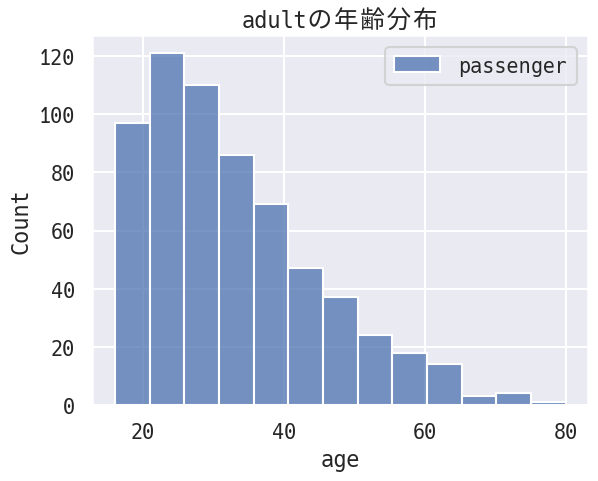

In [95]:
# 詳細は後のレクチャーで
sns.histplot(data=df_adult, x='age', bins=13, label='passenger')
# bins=13は5歳幅
plt.title('adultの年齢分布')
plt.legend()

plt.show()
# 日本語表示ができないため警告文が表示される

In [96]:
df_adult['age'].mean()

32.76782884310618

In [97]:
# google colaboratoryの場合
# !pip install japanize-matplotlib

In [98]:
# google colaboratoryの場合
# import japanize_matplotlib
# japanize_matplotlib.japanize()

# jupyterでもこちらを利用することができるが、以下のset_themeをコース内では用いていきます

In [99]:
sns.set_theme(font='HackGen Console NFJ', context='talk', style='darkgrid')
# context : paper, notebook, talk, poster
# style : dark, darkgrid, white, whitegrid, ticks
# 日本語対応は'MS Gothic', 'MS Mincho', 'Meiryo'。他にもあると思われます。

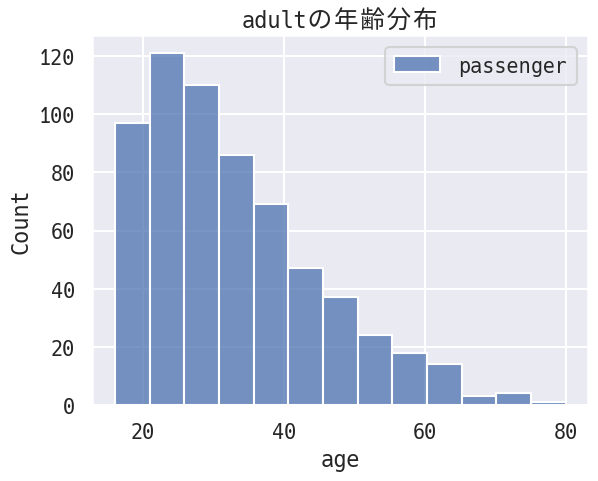

In [100]:
# 詳細は後のレクチャーで
sns.histplot(data=df_adult, x='age', bins=13, label='passenger')
plt.title('adultの年齢分布')
plt.legend()

plt.show()

'age'と'pclass'の関係

In [101]:
df_adult.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
0,0,3,male,22.0,1,0,7.2500,S,man
1,1,1,female,38.0,1,0,71.2833,C,woman
2,1,3,female,26.0,0,0,7.9250,S,woman


In [102]:
df.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


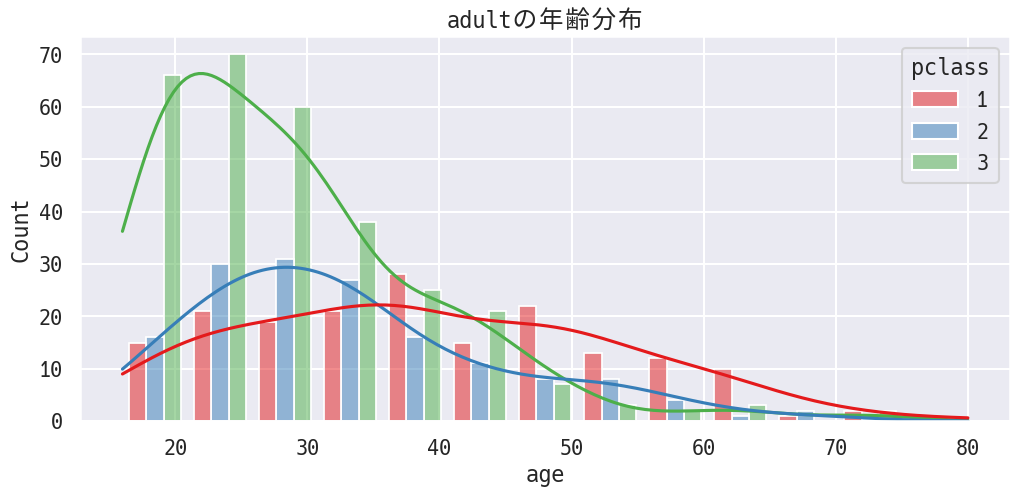

In [103]:
# 詳細は後のレクチャーで
plt.figure(figsize=(12, 5))
sns.histplot(data=df_adult, x='age', bins=13, hue='pclass', palette='Set1', multiple='dodge', shrink=0.8, kde=True)
plt.title('adultの年齢分布')

plt.show()

In [104]:
# figsize : インチ単位
# dpi : ドットパーインチ
# 例）figsize=(10, 5), dpi=100の場合
# 10×100＝1000  5×100＝500
# 1000×500=50万ピクセル（50万画素）

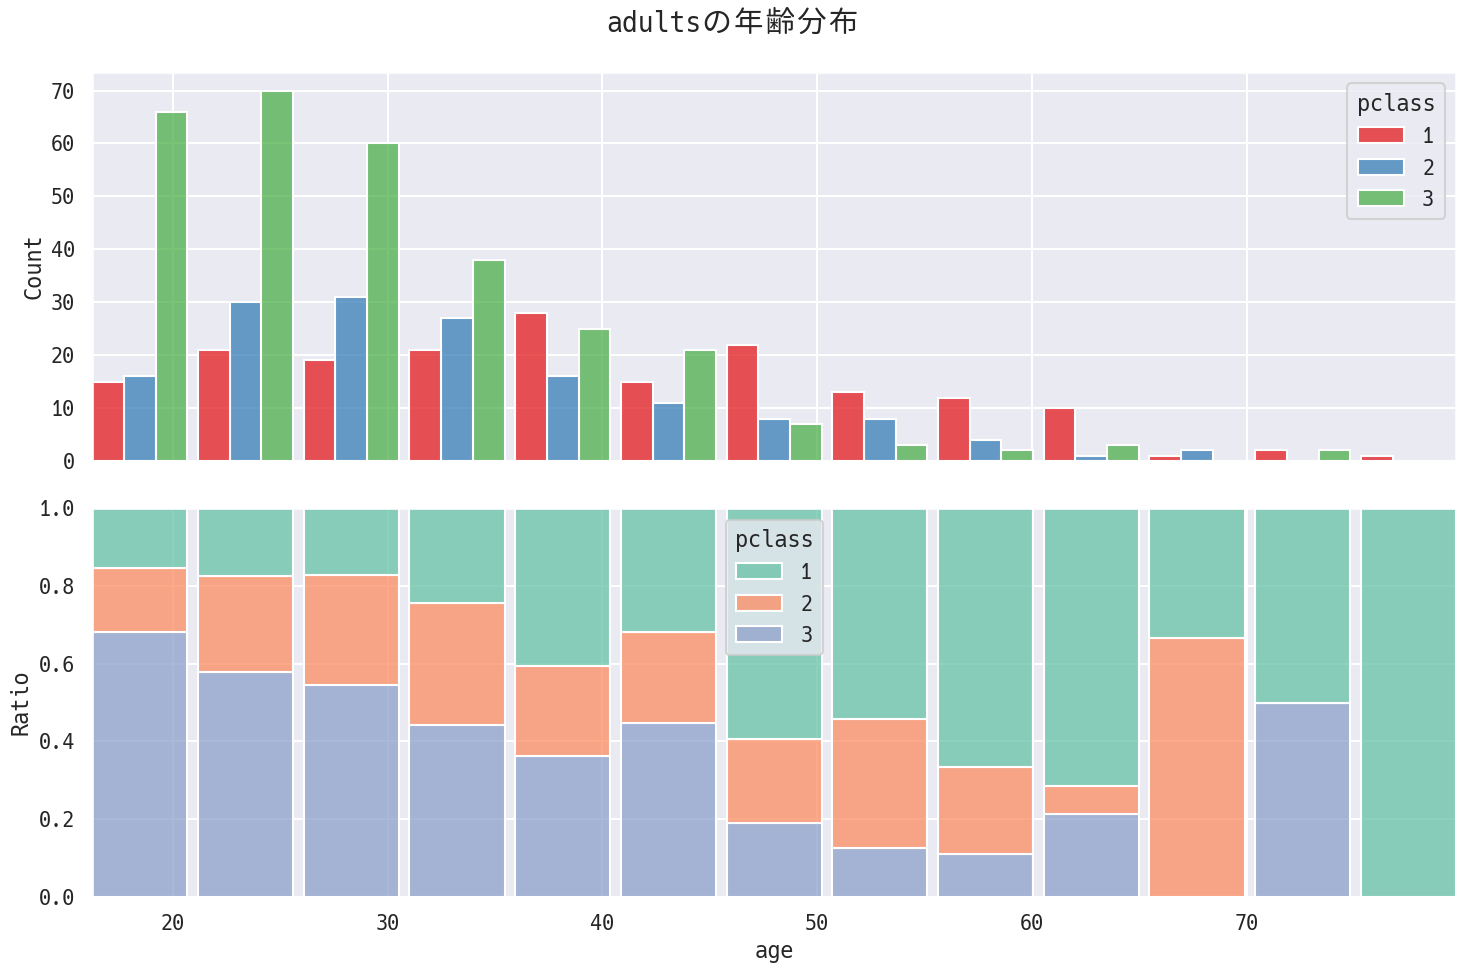

In [105]:
# 詳細は後のレクチャーで
fig, axes = plt.subplots(2, 1, figsize=(15, 10), tight_layout=True, sharex=True)
sns.histplot(data=df_adult, x='age', bins=13, hue='pclass', multiple='dodge', palette='Set1', shrink=0.9, ax=axes[0])
sns.histplot(data=df_adult, x='age', bins=13, hue='pclass', multiple='fill', palette='Set2', shrink=0.9, ax=axes[1])
axes[1].set_ylabel('Ratio')
axes[0]

fig.suptitle("adultsの年齢分布")

plt.show()

'age'と'sex'の関係

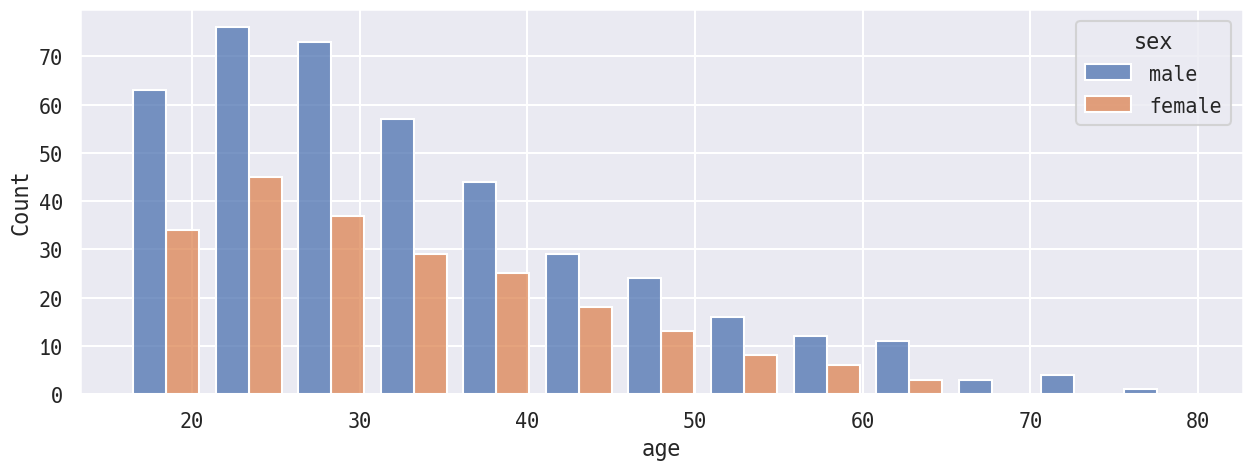

In [106]:
# 詳細は後のレクチャーで
plt.figure(figsize=(15,5))
sns.histplot(data=df_adult, x='age', bins=13, hue='sex', multiple='dodge', shrink=0.8)
plt.show()

相関関係

In [107]:
# 相関関係：correlation
# 相関係数：correlation coefficient
# -1 ～ 1の数字に標準化される
df_adult = df_adult.select_dtypes(["int", "float"])
print(df_adult.info())
df_adult.corr()

<class 'pandas.core.frame.DataFrame'>
Index: 631 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  631 non-null    int64  
 1   pclass    631 non-null    int64  
 2   age       631 non-null    float64
 3   sibsp     631 non-null    int64  
 4   parch     631 non-null    int64  
 5   fare      631 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 34.5 KB
None


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.390467,0.010352,0.088154,0.074216,0.296918
pclass,-0.390467,1.000000,-0.355523,-0.111805,-0.024458,-0.552295
age,0.010352,-0.355523,1.000000,-0.050841,0.037404,0.110403
sibsp,0.088154,-0.111805,-0.050841,1.000000,0.280791,0.221493
parch,0.074216,-0.024458,0.037404,0.280791,1.000000,0.217429
fare,0.296918,-0.552295,0.110403,0.221493,0.217429,1.000000


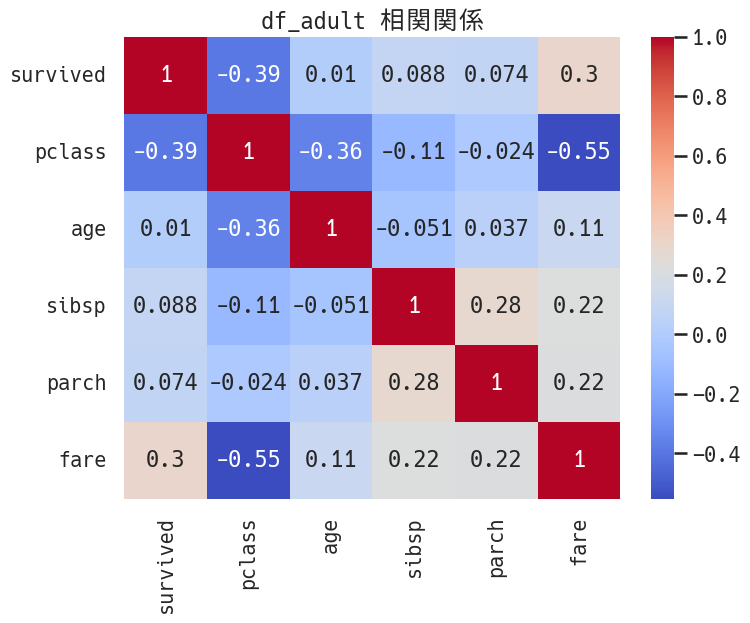

In [109]:
# 詳細は後のレクチャーで
plt.figure(figsize=(8, 6))
sns.heatmap(df_adult.corr(), annot=True, cmap='coolwarm')
plt.title('df_adult 相関関係')
plt.show()

個別の予測は困難であり、Seabornの学習がメインのため、レコードをすべて削除する

In [110]:
df.dropna(axis=0, inplace=True)

In [111]:
df.shape

(714, 9)

In [112]:
df.isnull().sum().sum()

0

CSVファイルとして保存する

In [113]:
df.to_csv('titanic_non_null.csv', index=False)

---
<a id=4></a>
[Topへ](#0)

---
## 4. カテゴリカルプロット

* キャットプロットとストリッププロット
 * **sns.catplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.catplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.catplot のページへ
        </a>
    </p>
    

* カウントプロット
    * **sns.countplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.countplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.countplot のページへ
        </a>
    </p>


* バープロット
 * **sns.barplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.barplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.barplot のページへ
        </a>
    </p>


* ボックスプロット
 * **sns.boxplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.boxplot のページへ
        </a>
    </p>
    

* バイオリンプロット
 * **sns.violinplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.violinplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.violinplot のページへ
        </a>
    </p>
    
    
* スウォームプロット
 * **sns.swarmplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.swarmplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.swarmplot のページへ
        </a>
    </p>
    


---

キャットプロットとストリッププロット

In [114]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
0,0,3,male,22.0,1,0,7.2500,S,man
1,1,1,female,38.0,1,0,71.2833,C,woman
2,1,3,female,26.0,0,0,7.9250,S,woman
3,1,1,female,35.0,1,0,53.1000,S,woman
4,0,3,male,35.0,0,0,8.0500,S,man


In [115]:
df.groupby('embarked')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,132.0,31.105455,15.566968,0.42,21.75,29.0,40.0,71.0
Q,28.0,28.089286,16.915396,2.00,17.50,27.0,34.5,70.5
S,554.0,29.445397,14.143192,0.67,21.00,28.0,38.0,80.0


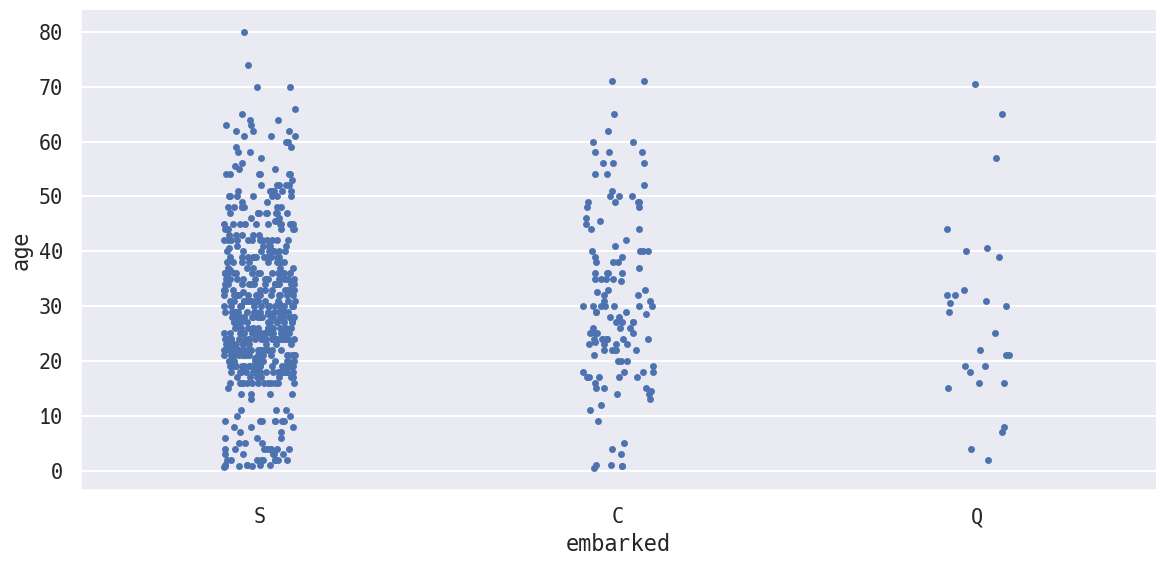

In [116]:
sns.catplot(data=df, x='embarked', y='age', height=6, aspect=2)
plt.show()
#  kind : 'strip'(default), 'swarm', 'box', 'violin', 'boxen', 'point', 'bar'

# catplotはカテゴリカルプロットを包括するようなものだと言ってよいと思います。
# 特徴は行・列にカテゴリーを加えたグリッド型の表現ができることです

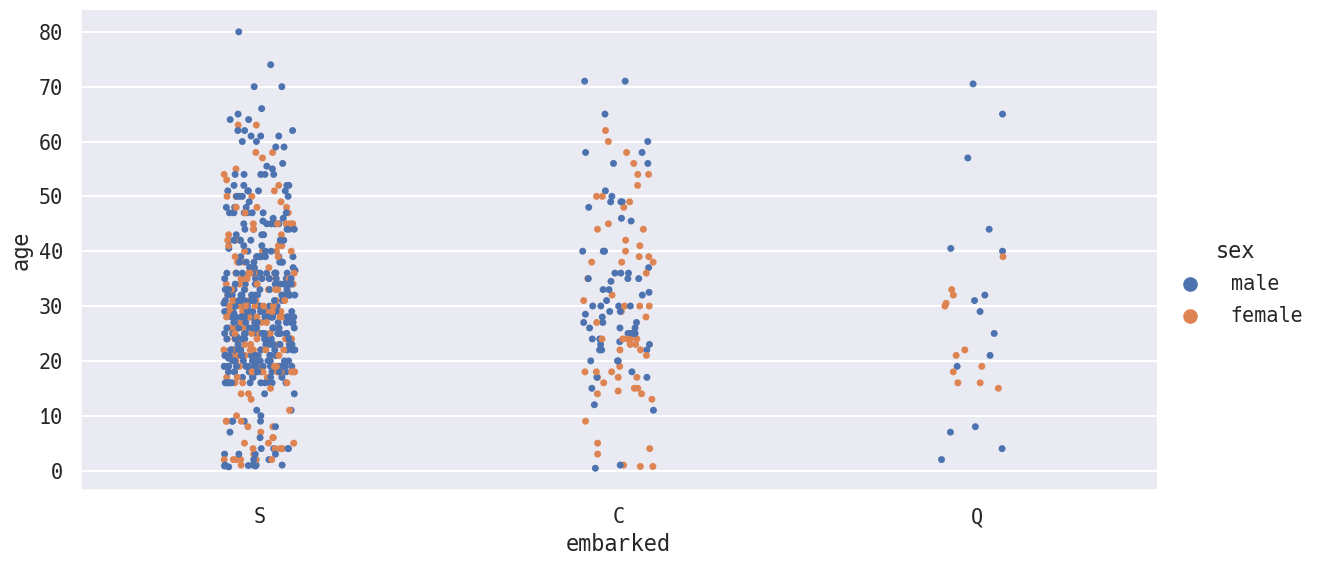

In [117]:
sns.catplot(data=df, x='embarked', y='age', hue='sex', height=6, aspect=2)
plt.show()
# hue:色相
# グリッド型を使えるものはheight,aspectでグラフのサイズを変更します

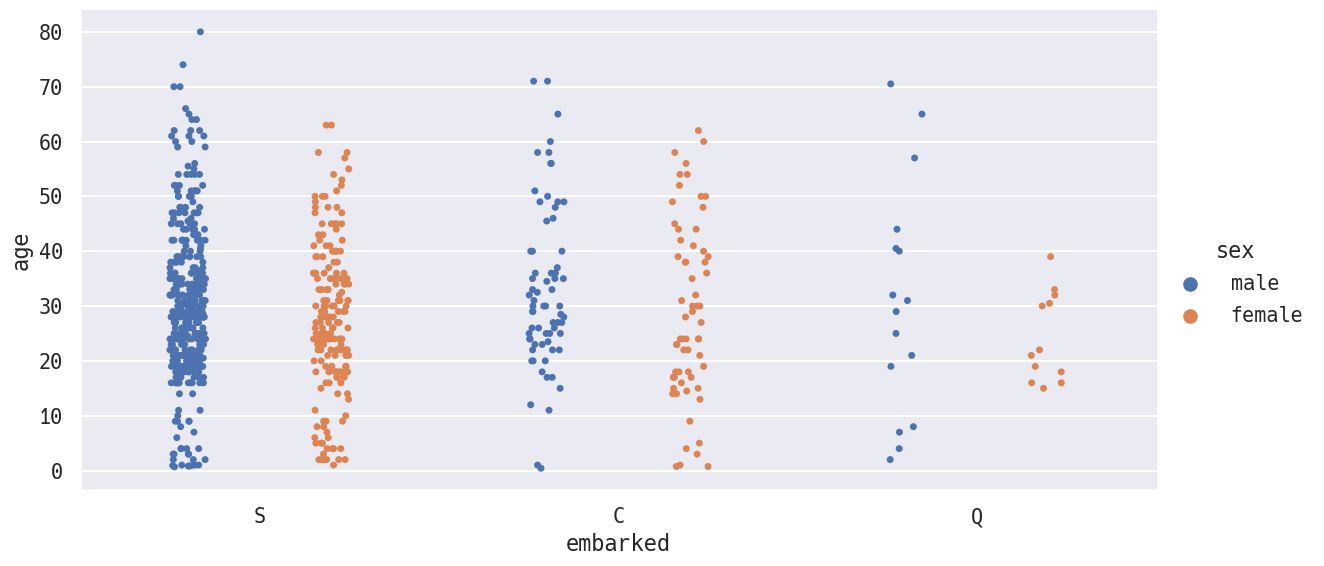

In [118]:
sns.catplot(data=df, x='embarked', y='age', hue='sex', dodge=True, height=6, aspect=2)
plt.show()
# hueで重なるものはdodge=Trueで分離できます

/var/folders/f5/_tj1zvq95fx0wllynn0tpq800000gn/T/ipykernel_9750/4190489558.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', palette='Greens')


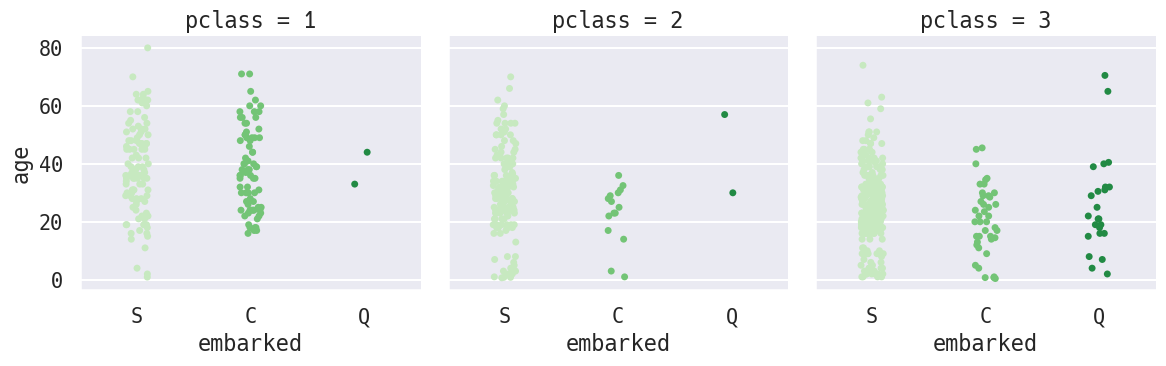

In [119]:
sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', palette='Greens')
plt.show()
# カラムを指定しました

/var/folders/f5/_tj1zvq95fx0wllynn0tpq800000gn/T/ipykernel_9750/4239429147.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', row='survived', palette='Reds')


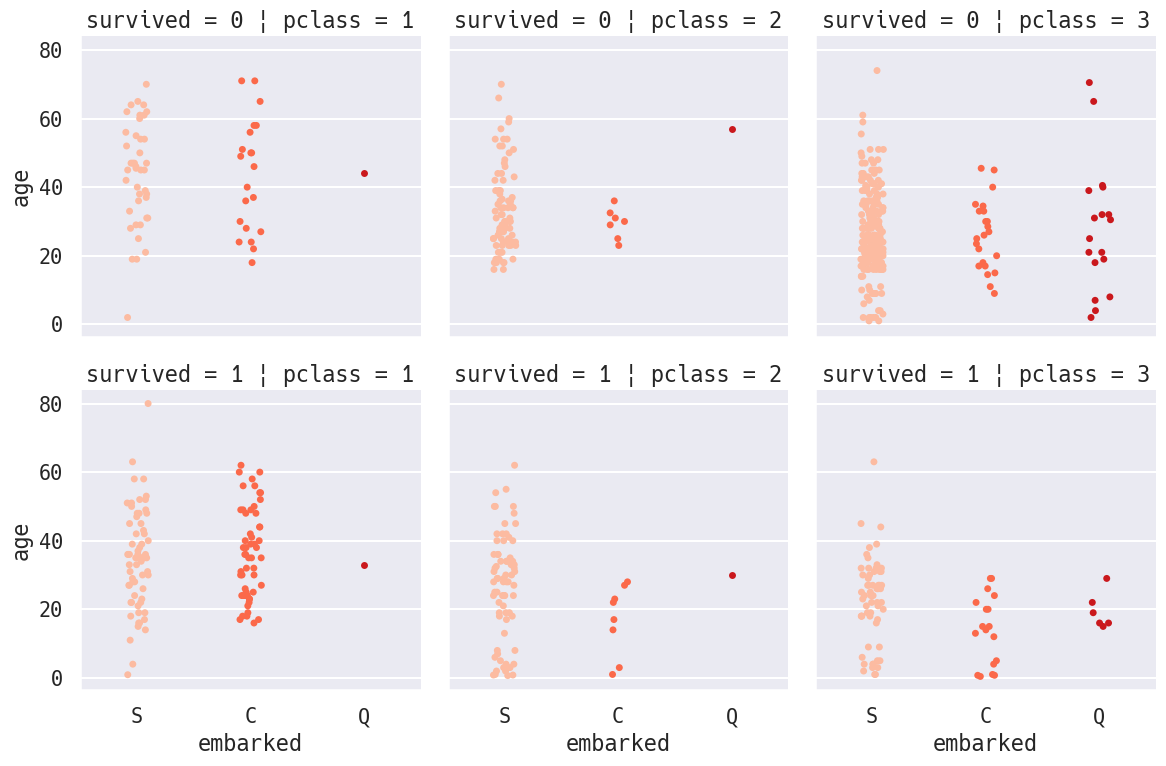

In [120]:
sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', row='survived', palette='Reds')
plt.show()
# ローも加えています

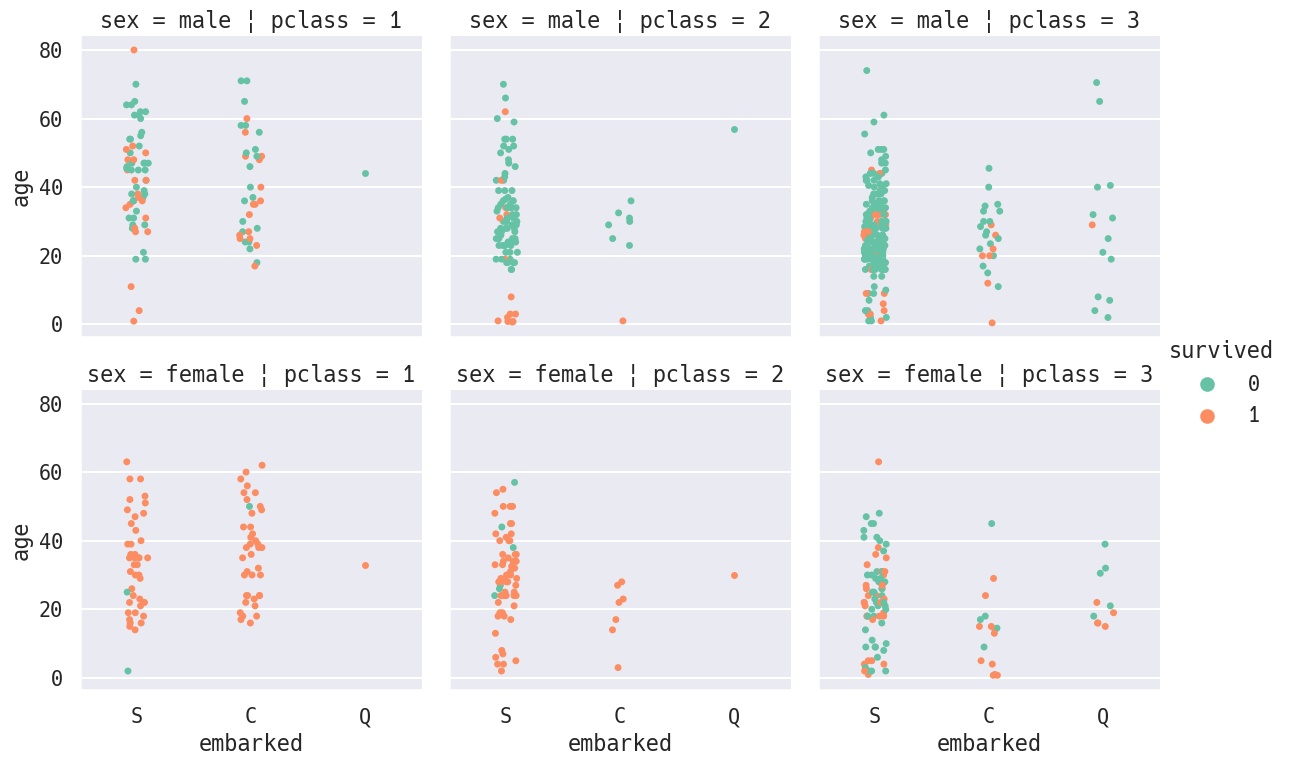

In [121]:
# row, colを設定
sns.catplot(data=df, x='embarked', y='age', height=4, col='pclass', row='sex', hue='survived', palette='Set2')
plt.show()
# hueにsurvivedを設定し、合計４つのカテゴリ、ひとつの数値データを扱っています

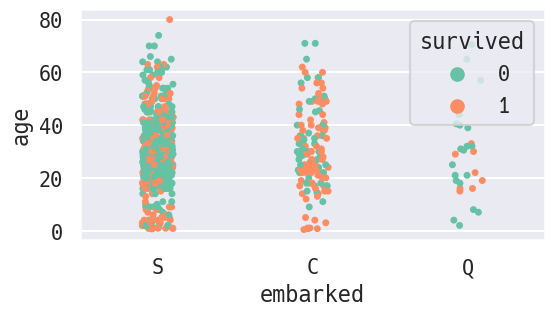

In [122]:
plt.figure(figsize=(6, 3))
sns.stripplot(data=df, x='embarked', y='age', hue='survived', palette='Set2')
plt.show()
# 単独の場合はstripplotを選択
# グラフのサイズ変更はfigsizeで

カウントプロット

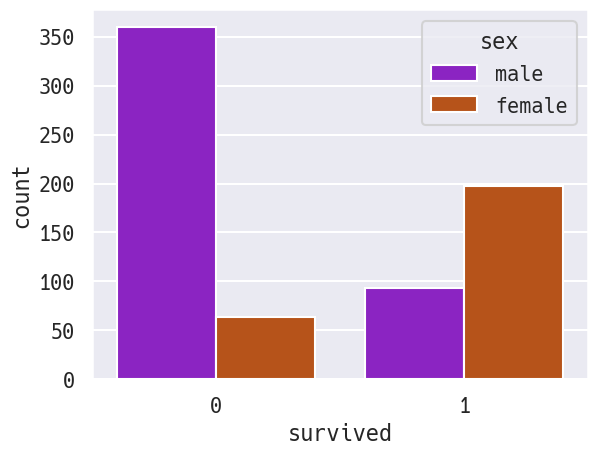

In [123]:
sns.countplot(data=df, x='survived', hue='sex', palette='gnuplot')
plt.show()

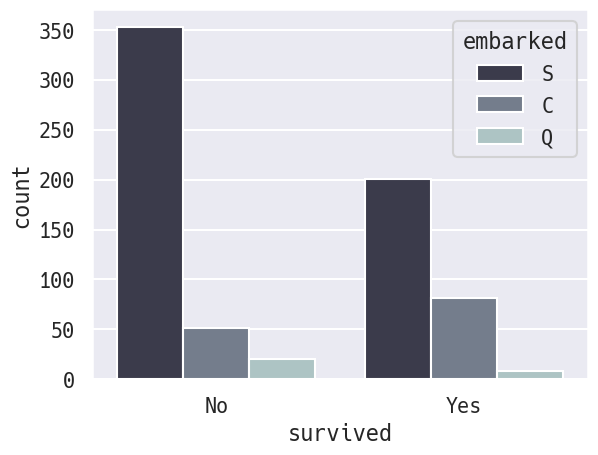

In [124]:
# xticks、目盛りの変更
sns.countplot(data=df, x='survived', hue='embarked', palette='bone')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

バープロット

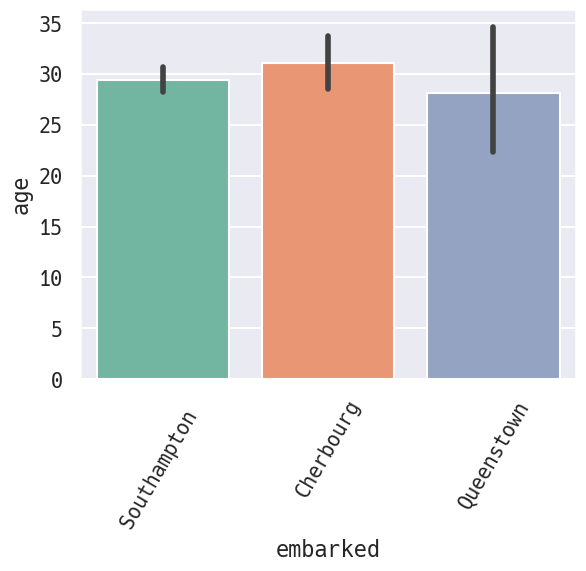

In [125]:
sns.barplot(data=df, x='embarked', y='age', palette='Set2')
# estimator:デフォルトは平均, np.std, np.median, np.var, np.cov(共分散)
plt.xticks([0, 1, 2], ['Southampton ', 'Cherbourg', 'Queenstown'], rotation=60)
plt.show()

In [126]:
df.groupby('embarked')['age'].mean()

embarked
C    31.105455
Q    28.089286
S    29.445397
Name: age, dtype: float64

ボックスプロット

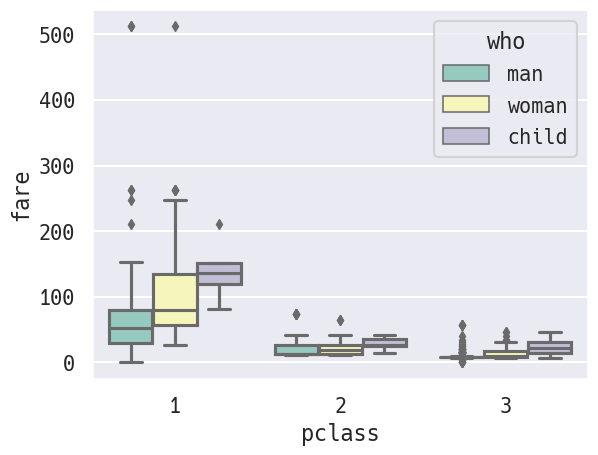

In [127]:
sns.boxplot(data=df, x='pclass', y='fare', hue='who', palette='Set3')
plt.show()

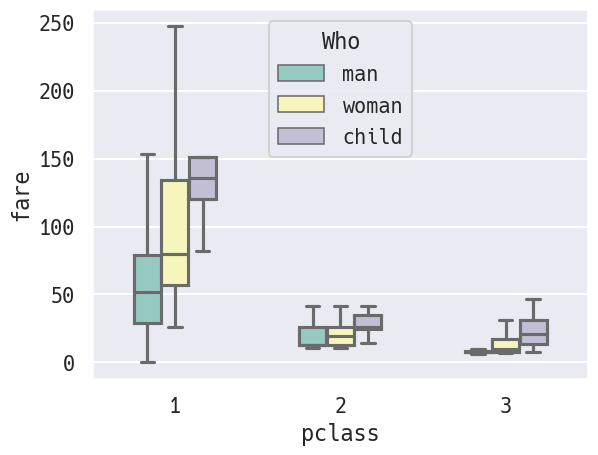

In [128]:
# sym=''で外れ値の表示をなくすことができる（symbol）
sns.boxplot(data=df, x='pclass', y='fare', hue='who', palette='Set3', sym='', width=0.5)
plt.legend(loc='upper center', title='Who')
plt.show()

In [129]:
df.groupby(['pclass', 'who'])['fare'].describe()

count        mean        std      min         25%        50%   
pclass who                                                                   
1      child    6.0  139.382633  43.666954  81.8583  120.000000  135.77500  \
       man     98.0   69.714414  81.084213   0.0000   28.800000   51.93125   
       woman   82.0  106.006657  77.542322  25.9292   57.244800   80.00000   
2      child   19.0   28.323905   7.750054  14.5000   24.500000   26.25000   
       man     90.0   20.493842  15.059067  10.5000   12.612500   13.00000   
       woman   64.0   20.812175  11.013748  10.5000   13.000000   19.12500   
3      child   58.0   23.220190  11.365095   7.2250   13.676075   21.07500   
       man    225.0   10.227127   7.927257   0.0000    7.750000    7.89580   
       woman   72.0   14.563542   9.436050   6.7500    7.872950    9.83960   

                   75%       max  
pclass who                        
1      child  151.5500  211.3375  
       man     79.1125  512.3292  
       woman  134.5000  512.3292  
2      child   34.8750   41.5792  
       man     26.0000   73.5000  
       woman   26.0000   65.0000  
3      child   31.2750   46.9000  
       man      8.6625   56.4958  
       woman   17.5000   46.9000

バイオリンプロット

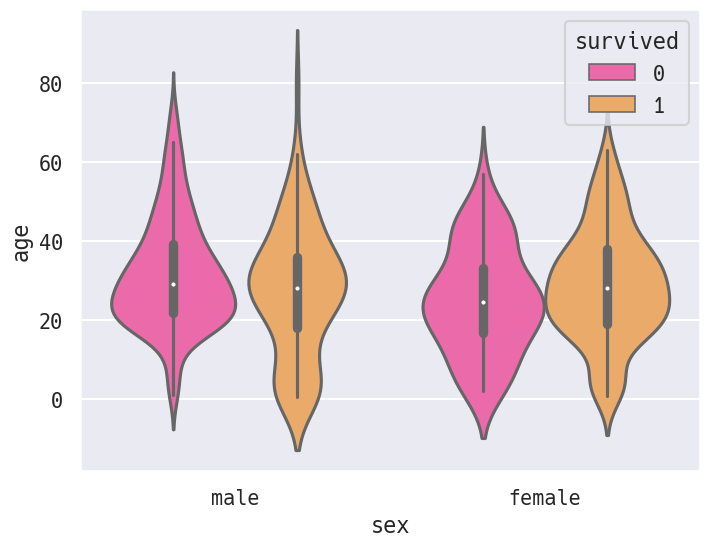

In [130]:
# combination of boxplot and kernel density estimate
# バイオリンの中には中央値、四分位範囲、最大値もしくは最小値もしくは外れ値との境界値が示されている
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='age', hue='survived', palette='spring')
plt.show()

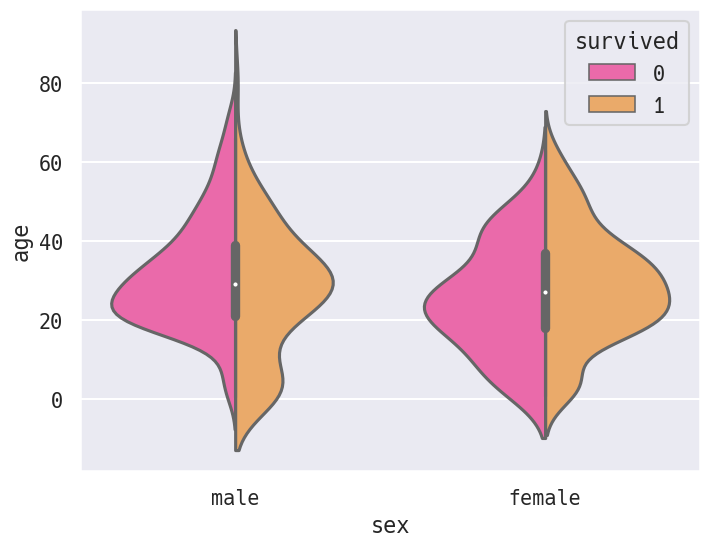

In [131]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='age', hue='survived', palette='spring', split=True)
plt.show()

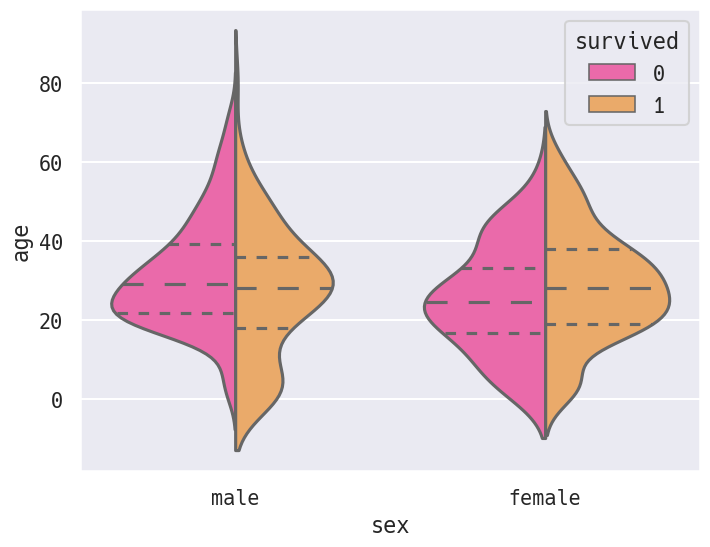

In [132]:
# inner='quartile'
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sex', y='age', hue='survived', palette='spring', split=True, inner='quartile')
plt.show()

スウォームプロット

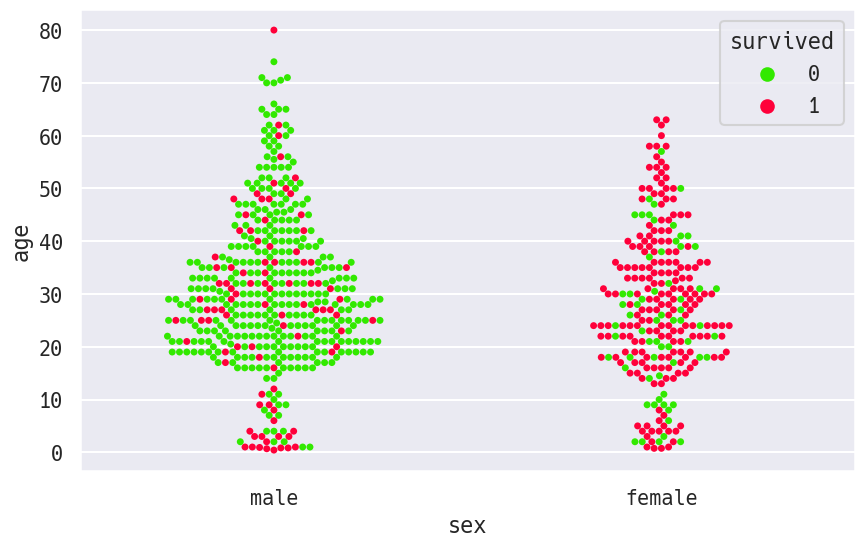

In [133]:
# swarm：群れ
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='sex', y='age', hue='survived', palette='prism')
plt.show()

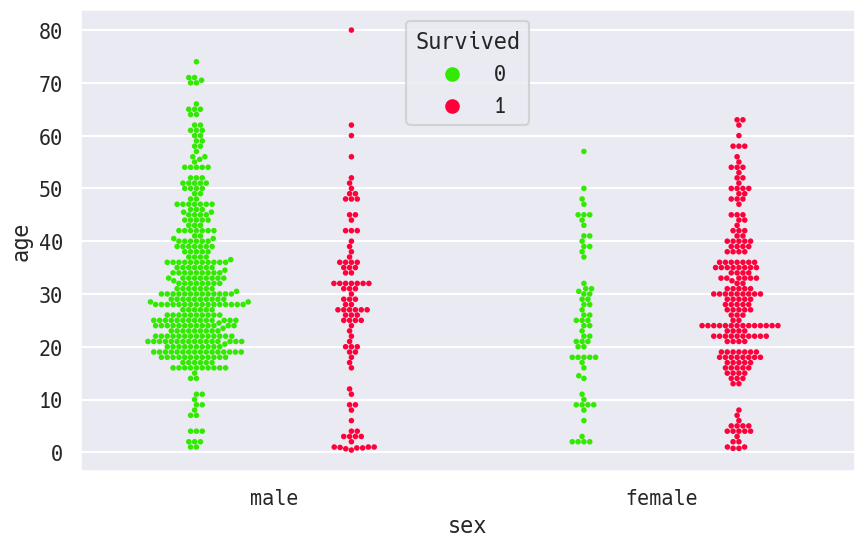

In [134]:
# dodge=True
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='sex', y='age', hue='survived', palette='prism', dodge=True, size=4)
plt.legend(loc='upper center', title='Survived')
plt.show()
# 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot. warnings.warn(msg, UserWarning)に対して, size=4での対応もできるがplt.figure(figsize=(15, 6))としてもよい

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---